In [1]:
import sys
import os.path
sys.path.append(os.path.join('..', 'util'))

import set_compiler
set_compiler.install()

import pyximport
pyximport.install()

import mandelbrot
from timer import Timer

import pylab as plt
import numpy as np
%matplotlib inline

# create coordinates, along with output count array
def make_coords(center=(-0.575 - 0.575j),
                width=0.0025,
                count=4000):

    x = np.linspace(start=(-width / 2), stop=(width / 2), num=count)
    xx = center + (x + 1j * x[:, np.newaxis]).astype(np.complex64)
    return xx, np.zeros_like(xx, dtype=np.uint32)

Compiling with /usr/local/bin/clang-omp


In [ ]:
in_coords, out_counts = make_coords()

In [ ]:
with Timer() as t:
        mandelbrot.avx_mandelbrot(in_coords, out_counts, 4, 511)
seconds = t.interval

print("{} Million Complex FMAs in {} seconds, {} million Complex FMAs / second".format(out_counts.sum() / 1e6, seconds, (out_counts.sum() / seconds) / 1e6))

plt.imshow(np.log(out_counts))
plt.show()

In [6]:
a = ([0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0])
print "len a:",len(a)
b = ([51, 51, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 54, 54, 54, 54, 55,
       55, 56, 56, 56, 57, 58, 58])
print "len b:",len(b)

len a: 48
len b: 24


In [11]:
for i in range(0,64,8):
    print i

0
8
16
24
32
40
48
56


In [7]:
out_counts[0,0:200]

array([51, 51, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 54, 54, 54, 54, 55,
       55, 56, 56, 56, 57, 58, 58,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, 46, 46, 46, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44,
       44, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42,
       42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 37], dtype=uint32)

Each iteration we do: $z=z*z+c$ when $z^2<=4$.
<br /><br />
Using these two properties of complex numbers we can split up $z=z*z+c$ into its real and imaginary components:

Multiplication: $(a+bi)(c+di) = (ac - bd) + (ad + bc)i$
<br /><br />
Let $z=(z_1+z_2i)$. 
<br />
Then: 
<br />
$z*z=(z_1+z_2i)(z_1+z_2i)$<br />
$=(z_1^2-z_2^2)+2(z_1z_2)i$<br />
(now this is in the form $(a+bi)$<br />
<br /><br />
Addition: $(a+bi)+(c+di) = (a+c) + (bi+di)$
<br /><br />
Let $c=(c_1+c_2i)$.<br />
Then: <br />
$z*z+c=[(z_1^2-z_2^2)+2(z_1z_2)i]+(c_1+c_2i)$<br />
$=(z_1^2-z_2^2+c_1)+(2z_1z_2+c_2)i$

In [12]:
a = in_coords[10,11]
print a
print np.real(a)
print np.imag(a)

b = a**2
print b
print np.real(b)
print np.imag(b)

(-0.576243-0.576244j)
-0.576243102551
-0.576243758202
(-7.55629269378e-07+0.664112982103j)
-7.55629269378e-07
0.664112982103


1074.656613 Million Complex FMAs in 5.60505104065 seconds, 191.730031574 million Complex FMAs / second


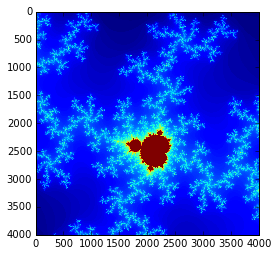

In [2]:


with Timer() as t:
    mandelbrot.mandelbrot(in_coords, out_counts, 1024)
seconds = t.interval

print("{} Million Complex FMAs in {} seconds, {} million Complex FMAs / second".format(out_counts.sum() / 1e6, seconds, (out_counts.sum() / seconds) / 1e6))

plt.imshow(np.log(out_counts))
plt.show()

In [4]:
in_coords, out_counts = make_coords()

nthreads = [1,2,4]

for nthread in nthreads:
    with Timer() as t:
        mandelbrot.pmandelbrot(in_coords, out_counts, nthread=nthread, max_iterations=1024)
    seconds = t.interval

    print nthread,"threads:"
    print("{} Million Complex FMAs in {} seconds, {} million Complex FMAs / second".format(out_counts.sum() / 1e6, seconds, (out_counts.sum() / seconds) / 1e6))

    #plt.imshow(np.log(out_counts))
    #plt.show()

1 threads:
1074.656613 Million Complex FMAs in 5.98635601997 seconds, 179.517658057 million Complex FMAs / second
2 threads:
1074.656613 Million Complex FMAs in 2.773416996 seconds, 387.484685696 million Complex FMAs / second
4 threads:
1074.656613 Million Complex FMAs in 1.61921191216 seconds, 663.691148103 million Complex FMAs / second


In [13]:
i = 2j*3
print i
print np.real(i)
print np.imag(i)

print
print i**2
print np.real(i**2)
print np.imag(i**2)
print
i2 = i**2 + i
print i2
print np.real(i2)
print np.imag(i2)

6j
0.0
6.0

(-36+0j)
-36.0
0.0

(-36+6j)
-36.0
6.0


In [5]:
in_coords.shape

(4000, 4000)

In [14]:
a = in_coords[0,1]
print a
print np.real( a )
print np.imag( a )

(-0.576249-0.57625j)
-0.576249361038
-0.576250016689


In [21]:
%%timeit
mandelbrot.example_sqrt_8(np.arange(8).astype("float32"))

The slowest run took 59.23 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 5.22 µs per loop


In [24]:
%%timeit
np.sqrt(np.arange(8).astype("float32"))

The slowest run took 20.36 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.87 µs per loop


In [23]:
np.sqrt(np.arange(8))

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131])